Akan membangun model machine learning berupa klasifikasi (supervised model) dari data load_iris yang diperoleh dari https://scikit-learn.org/1.5/datasets/toy_dataset.html

# 1. Read Dataset

In [2]:
import pandas as pd
from sklearn import datasets

# Memuat dataset Iris dari scikit-learn
iris = datasets.load_iris()
x = iris.data #input
y = iris.target #output

# Mengonversi data fitur dan target menjadi Dataframe
df_x = pd.DataFrame (x, columns = iris.feature_names)
df_y = pd.Series (y, name = 'species')

# Menggabungkan fitur dan target dalam suatu DataFrame
df = pd.concat([df_x, df_y], axis = 1)

df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


# 2. Data Pre-Processing

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [6]:
# Mengecek missing value
df.isnull().sum()

,0
sepal length (cm),0
sepal width (cm),0
petal length (cm),0
petal width (cm),0
species,0


In [7]:
# Mengakses kolom 'species' yang unique
df['species'].unique()

array([0, 1, 2])

In [8]:
# Menghitung masing-masing spesies

df['species'].value_counts()

,count
species,
0,50
1,50
2,50


In [9]:
# Statistik Deskriptif
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


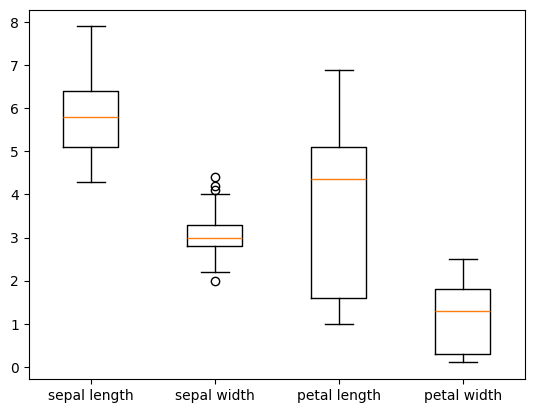

In [12]:
# Mengecek outlier
import matplotlib.pyplot as plt
plt.boxplot(df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]) # Memilih kolom
plt.xticks([1, 2, 3, 4], ['sepal length', 'sepal width', 'petal length', 'petal width']) # Memberi label pada axis
plt.show()

# 3. Split Data

Memisahkan variabel prediktor dan variabel target

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split

# Membagi data menjadi train dan test
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size = 0.2, random_state = 100)
print(f"Number of train data: {len(x_train)}")
print(f"Number of testing data: {len(x_test)}")

Number of train data: 120
Number of testing data: 30


# 4. Train The Model

In [15]:
from sklearn.tree import DecisionTreeClassifier

# Membuat model Decision Tree
model = DecisionTreeClassifier(random_state = 100)

# Melatih model dengan data train
model.fit(x_train, y_train)

DecisionTreeClassifier(random_state=100)

# 5. Predict & Evaluate

In [16]:
from sklearn.metrics import accuracy_score

# Melakukan prediksi pada data test
y_pred = model.predict(x_test)

# Menghitung akurasi model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100:.2f}%")

Accuracy: 96.67%


Akurasinya sudah cukup baik sehingga tidak perlu dilakukan hyperparameter tuning

# 6. Visualization

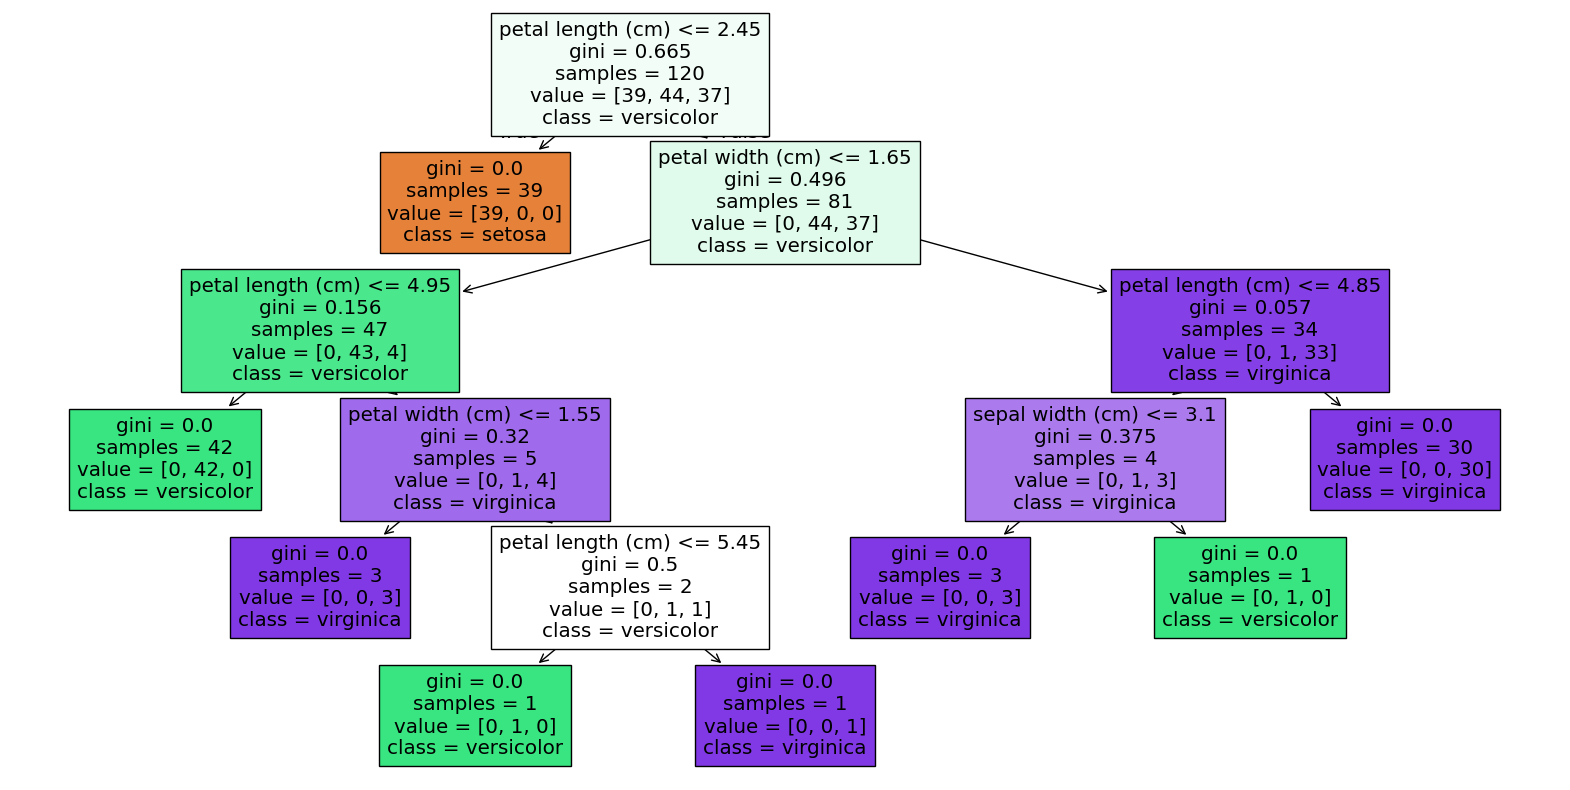

In [17]:
import matplotlib.pyplot as plt
from sklearn import tree

# Visualisasi model decision tree
plt.figure(figsize = (20,10))
tree.plot_tree(model,
               feature_names = iris.feature_names,
               class_names = iris.target_names,
               filled = True)
plt.show()